<a href="https://colab.research.google.com/github/jenniferarzu/nyu-python-public-policy/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jennifer Arzu**

# **HOMEWORK 6 Coding: Trends in when different types of 311 occur over time**

**Problem:** Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [0]:
# Using pd.set_option() to make sure  see all the rows and columns in dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [95]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#loading 311 data
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Step 1.** Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.

In [97]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0


In [98]:
top_10=df.groupby('complaint_type').size().nlargest(10).reset_index(name='top_10')
top_10

,complaint_type,top_10
0,Noise - Residential,236350
1,HEAT/HOT WATER,205985
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Noise - Street/Sidewalk,95977
6,Street Condition,93341
7,UNSANITARY CONDITION,81713
8,Water System,70509
9,Noise,59007


**Step 2.** Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.

In [0]:
filtered_311=df[df.complaint_type.isin(top_10.complaint_type)]

In [100]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,08/01/2018 12:01:09 AM,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,08/01/2018 12:01:10 AM,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0



**Step 3.** Convert the created_date column in filtered_311 to be a datetime series.

In [101]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


**Step 4.** Create 6 new columns in filtered_311 that extract each of the following from created_date

- year
- date
- month
- weekday
- weekday_name
- hour

In [103]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour

filtered_311.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0



**Step 5. Trends by hour** 

Find the count of 311 requests per hour and date for each complaint type


Find the count of 311 requests per hour and date for each complaint type:
- **Hint:** Use the pandas groupby function to aggregate the filtered_311 dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.


Find the median count of 311 requests per hour for each complaint type
- **Hint:** Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.


Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. The final chart should look similar to this:

In [0]:
#Find the count of 311 requests per hour and date for each complaint type
requests_per_datehour = filtered_311[['date', 'hour', 'complaint_type']].groupby(['date', 'hour', 'complaint_type']).size().reset_index(name='count_311_requests')

In [105]:
requests_per_datehour.head()

,date,hour,complaint_type,count_311_requests
0,2018-08-01,0,Blocked Driveway,8
1,2018-08-01,0,HEAT/HOT WATER,4
2,2018-08-01,0,Illegal Parking,11
3,2018-08-01,0,Noise,9
4,2018-08-01,0,Noise - Residential,29


In [0]:
#Find the median count of 311 requests per hour for each complaint type
requests_hour = requests_per_datehour.groupby(['hour','complaint_type'])['count_311_requests'].median().reset_index(name='requests_median')

In [107]:
requests_hour.head()

,hour,complaint_type,requests_median
0,0,Blocked Driveway,13.0
1,0,HEAT/HOT WATER,11.0
2,0,Illegal Parking,15.0
3,0,Noise,6.0
4,0,Noise - Residential,41.0


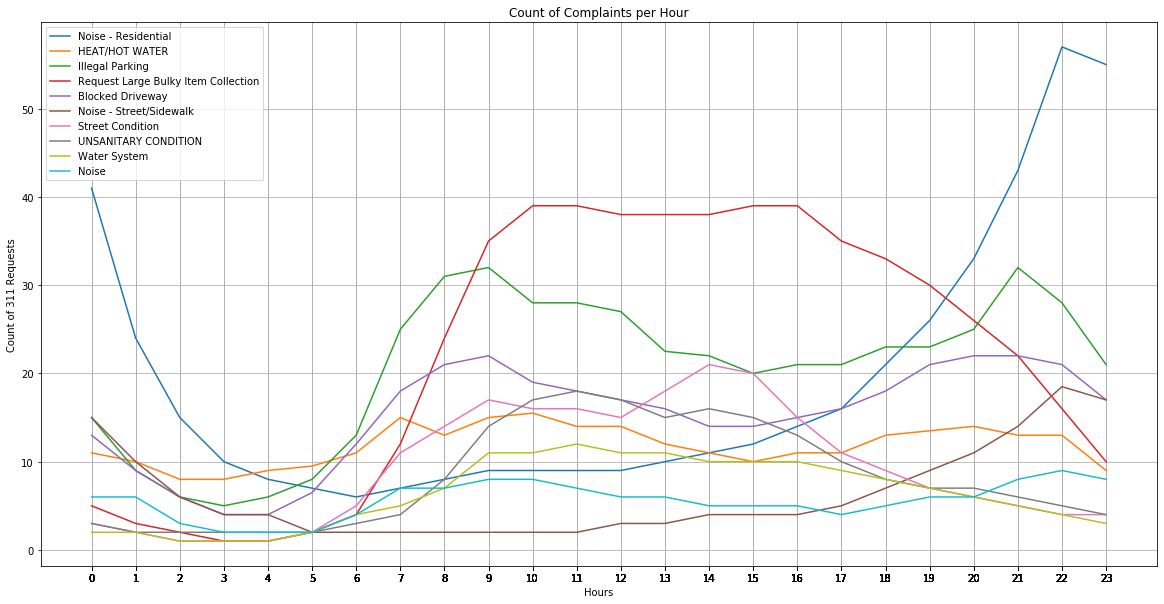

In [144]:
#Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. 
#The x values will be hours and the y values will be the median count of requests per complaint type. 
#Use a for loop to produce the 10 lines all in one figure. 

plt.figure(figsize=(20,10))

for i in top_10.complaint_type: 
  subset=requests_hour[requests_hour.complaint_type==i]
  plt.plot(subset.hour, subset.requests_median, label=i)
 
plt.grid()
plt.title('Count of Complaints per Hour')
plt.xticks(requests_hour.hour)
plt.xlabel('Hours')
plt.ylabel('Count of 311 Requests')

plt.legend()

**Step 6.Trends by day of week**

Reproduce the steps in 5, but this time aggregate by weekday, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

In [110]:
#Finding the count of 311 requests per weekday and date for each complaint type
requests_per_weekdaydate= filtered_311[['weekday','weekday_name','date', 'complaint_type']].groupby(['weekday','weekday_name','date', 'complaint_type']).size().reset_index(name='count_311_requests')

#quickly checking to make sure coded correct
requests_per_weekdaydate.head()

,weekday,weekday_name,date,complaint_type,count_311_requests
0,0,Monday,2018-08-06,Blocked Driveway,373
1,0,Monday,2018-08-06,HEAT/HOT WATER,80
2,0,Monday,2018-08-06,Illegal Parking,473
3,0,Monday,2018-08-06,Noise,108
4,0,Monday,2018-08-06,Noise - Residential,303


In [116]:
#Finding the median count of 311 requests per hour for each complaint type
requests_weekdays =requests_per_weekdaydate.groupby(['weekday','weekday_name','complaint_type'])['count_311_requests'].median().reset_index(name='requests_median')

#quickly checking to make sure coded correct
requests_weekdays.head()

,weekday,weekday_name,complaint_type,requests_median
0,0,Monday,Blocked Driveway,372.0
1,0,Monday,HEAT/HOT WATER,292.0
2,0,Monday,Illegal Parking,509.0
3,0,Monday,Noise,147.0
4,0,Monday,Noise - Residential,419.0


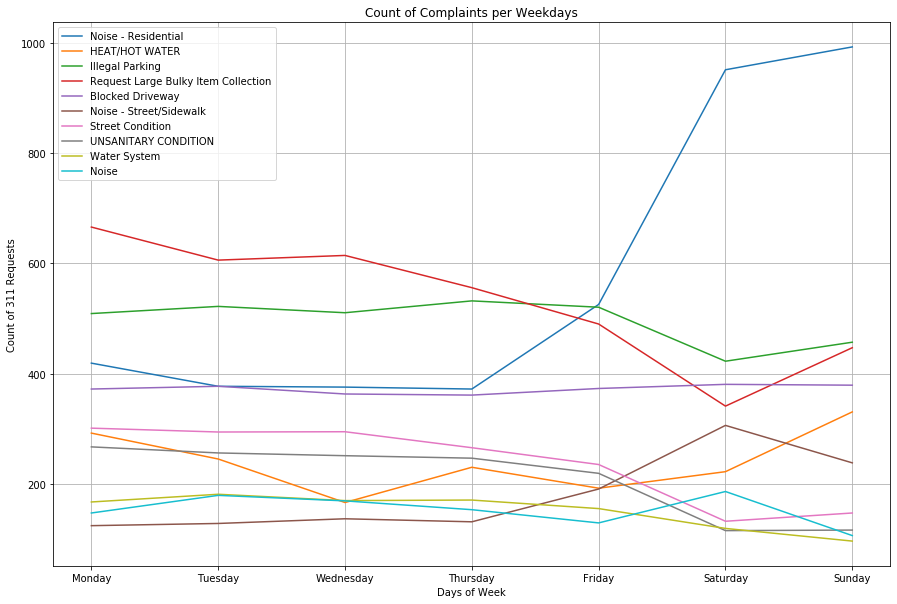

In [145]:
plt.figure(figsize=(15,10))

for i in top_10.complaint_type: 
  subset=requests_weekdays[requests_weekdays.complaint_type==i]
  plt.plot(subset.weekday_name, subset.requests_median, label=i)
 
plt.grid()
plt.title('Count of Complaints per Weekdays')
plt.xlabel('Days of Week')
plt.ylabel('Count of 311 Requests')

plt.legend()

**Step 7. Trends by month**

Reproduce the steps in 5, but this time aggregate by month, year (not date), and complaint_type. Produce a similar plot where x values will days of the week and y values will be the median count of requests per complaint type

In [122]:
#Finding the count of 311 requests per month, year for each complaint type
requests_per_yearmonth= filtered_311[['year','month','complaint_type']].groupby(['year','month', 'complaint_type']).size().reset_index(name='count_311_requests')

#quickly checking to make sure coded correct
requests_per_yearmonth.head()

,year,month,complaint_type,count_311_requests
0,2018,8,Blocked Driveway,10871
1,2018,8,HEAT/HOT WATER,2734
2,2018,8,Illegal Parking,13853
3,2018,8,Noise,3917
4,2018,8,Noise - Residential,16542


In [124]:
#Finding the median count of 311 requests per hour for each complaint type
requests_month =requests_per_yearmonth.groupby(['month','complaint_type'])['count_311_requests'].median().reset_index(name='requests_median')

#quickly checking to make sure coded correct
requests_month.head()

,month,complaint_type,requests_median
0,1,Blocked Driveway,11393.0
1,1,HEAT/HOT WATER,46387.0
2,1,Illegal Parking,13189.0
3,1,Noise,4805.0
4,1,Noise - Residential,16176.0


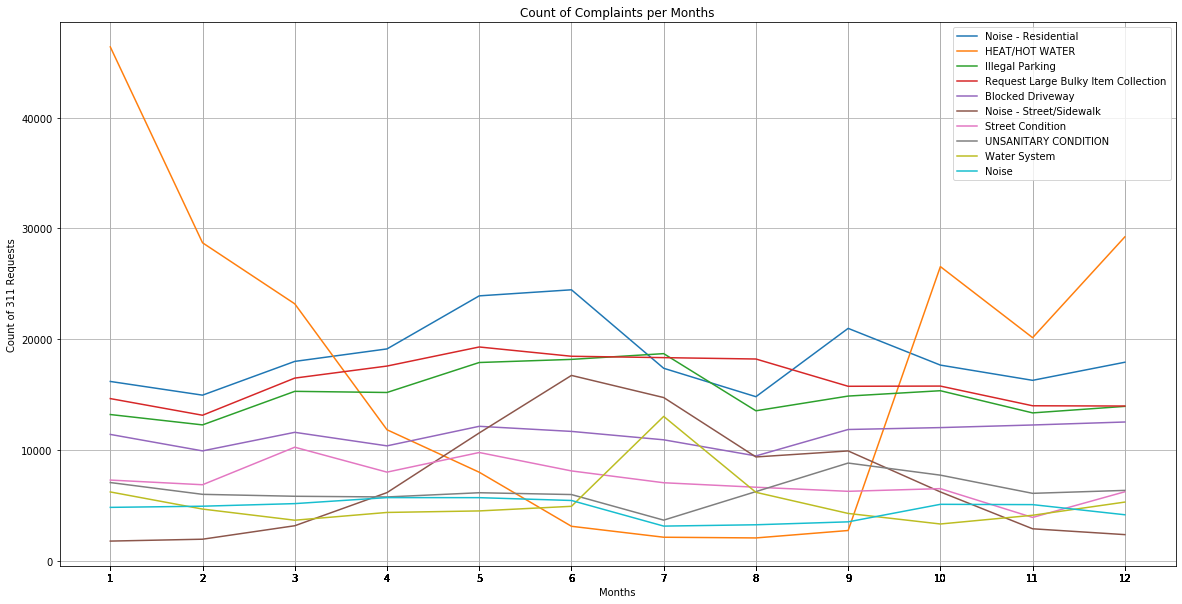

In [146]:
plt.figure(figsize=(20,10))

for i in top_10.complaint_type: 
  subset=requests_month[requests_month.complaint_type==i]
  plt.plot(subset.month, subset.requests_median, label=i)
 
plt.grid()
plt.xticks(requests_month.month)
plt.title('Count of Complaints per Months')
plt.xlabel('Months')
plt.ylabel('Count of 311 Requests')

plt.legend(loc=1)

**Step 8.** Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

Examination of count of 311 requests per complaint type over time revealed that:
- Heat/Hot water complaints increased through Fall and Winter months with highest in January. There is a rise in complaints of unsanitary conditions during warmer months, with greatest number of complaints in June. Complaints of water systems increase and peak during summer months, with the highest in July.
- With respect to days of the week, noise/residential complaints increased starting from Thursday with highest on Sunday. Requests of large bulky item collection, however, decreased throughout the week, with highest on Monday and lowest on Saturdays. This decrease is most likely correlated with bulky item collection day.
- A view of the complaints by hour indicate that heat and hot water complaints were highest throughout the day, increasing from 6 to 10 in the morning, remaining steady until 4, and declining thereafter. In contrast, residential noise complaints increased during evening and night hours, with a decrease in the number of complaints after midnight.
Overall, depending on the complaint type, the hours versus weekdays versus months charts provide a better depiction of trends over time. For instance, a clearer trend is observed for heat/hot water in months chart while trends in residential noise complaints are better visualized in hours chart.